Sample Data:
   accidents  traffic_fine_amount  traffic_density  traffic_lights  \
0         20               4.3709           2.3049         753.000   
1         11               9.5564           3.2757           5.452   
2         19               7.5879           2.0989           6.697   
3         23               6.3879           4.9188           9.412   
4         23               2.4042           1.9610           7.393   

   pavement_quality  urban_area  average_speed  rain_intensity  vehicle_count  \
0            0.7700           1        321.592          1.1944       290.8570   
1            4.0540           1        478.623          6.2960       931.8120   
2          345.0000           0        364.476          2.8584       830.0860   
3            4.7290           0         20.920          2.1065       813.1590   
4            1.7111           1         37.378          1.7028         1.4663   

   time_of_day             Variable  \
0     160.4320            accidents   
1

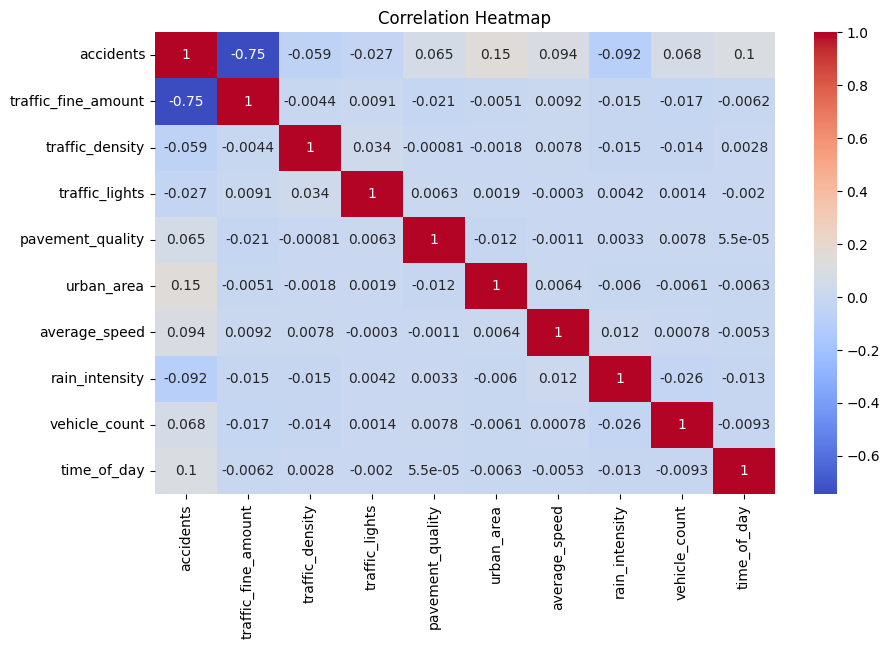

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [12]:

# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Load the dataset (uploaded file)
df = pd.read_csv('traffic_accidents.csv')

print("Sample Data:")
print(df.head())
# Step 3: Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Step 4: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Step 5: Basic statistics
print("\nDataset Summary:")
print(df.describe())

# Step 6: Data visualization (e.g., correlation heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 7: Preprocess the data
# Select numeric features and drop NaNs
df = df.select_dtypes(include=['number']).dropna()

# Example: Assume last column is the label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Step 8: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Evaluate the model
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error # Import mean_squared_error

# ... (rest of the code remains the same until Step 7) ...

# Step 7: Preprocess the data
# Select numeric features and drop NaNs
df = df.select_dtypes(include=['number']).dropna()

# Example: Assume last column is the label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Check if the target variable is continuous or categorical
if pd.api.types.is_numeric_dtype(y):  # Check if 'y' is numeric
    print("Target variable is continuous. Using RandomForestRegressor.")
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # Use Regressor for continuous target
    metric = 'mean_squared_error'  # Set the appropriate evaluation metric
else:
    print("Target variable is categorical. Using RandomForestClassifier.")
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Use Classifier for categorical target
    metric = 'accuracy'  # Set the appropriate evaluation metric

# Step 8: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train the model
model.fit(X_train, y_train)

# Step 10: Evaluate the model
y_pred = model.predict(X_test)

if metric == 'accuracy':
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))

Target variable is continuous. Using RandomForestRegressor.

Mean Squared Error: 9119.865731505688
